# Tutorial 9: Playing with interferometric data from the Sun

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = "/Users/sabrinaberger/TA/phys512/tutorial_10/" # your path to the data
sun = np.load(data + "SunDataRR83.npz")
sunV = sun["arr_1"][12000:21904] # voltages measured
sunT = sun["arr_0"][12000:21904] # times of measurements
sunTsamp = (sun["arr_0"][len(sun["arr_0"])-1] - sun["arr_0"][0]) / len(sun["arr_0"]) # sampling size from data acquisition

Start with a plot of voltage versus time. Do you see a fringe pattern? (What's a fringe pattern? https://www.eso.org/sci/meetings/2015/eris2015/L1_Jackson_Interferometry.pdf)

Text(0.5, 1.0, 'Raw data of the Sun from two radio dishes')

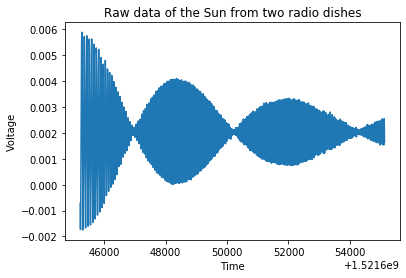

In [3]:
plt.plot(sunT, sunV) 
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("Raw data of the Sun from two radio dishes")

We're going to calculate the power spectrum of the Sun for some data acquired with two Leuschner Observatory radio telescopes in 2018. The data is in the current folder you've pulled from GitHub (SunDataRR83.npz).

Let's write functions to window our data, calculate the Fourier transform and then the power spectrum. Numpy (https://docs.scipy.org/doc/numpy/reference/routines.window.html) offers a variety of windowing functions that we can apply. Test out several of them and choose the one you think works the best!

In [4]:
def window(voltage, window_function):
    """
    Write a function to window your function using any of Numpy's windowing functions
    """
    return np.multiply(voltage, window_function(len(voltage)))

def getFT(input_voltage, t_samp): 
    """
    Write a function to take the Fourier transform of your data using numpy's FFT function where t_samp is 
    the sampling time of the data
    """
    fourier = np.fft.fft(input_voltage)
    freqs = np.fft.fftfreq(len(fourier), t_samp) 

    return fourier, freqs

def getPower(voltage, freqs):
    """
    Write a function to get the power spectrum of your data. You may have to subtract off the mean of your data.
    """
    power = np.abs(voltage)**2

    return np.fft.fftshift(power), np.fft.fftshift(freqs) 
# Note that fftshift will shift the zero frequency component to the center of the spectrum

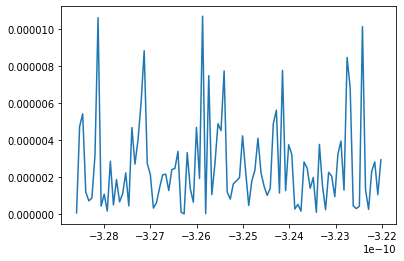

In [5]:
windowed = window(sunV, np.bartlett)
v, f = getFT(sunV, sunT)
power, f = getPower(v, f)
plt.plot(f[0:100], power[0:100])

What do you see? This is pretty messy data so we're not expecting you to see anything too illuminating, but see if you can manipulate the data in some way so you're seeing something other than just one peak. Don't worry about the frequency and time axes. These will be off!

Now see if you can write some code to create a waterfall plot of this data (frequency versus time). You're going to have to reshape your data into 2D. See an example waterfall plot of a fast radio burst detection below. 

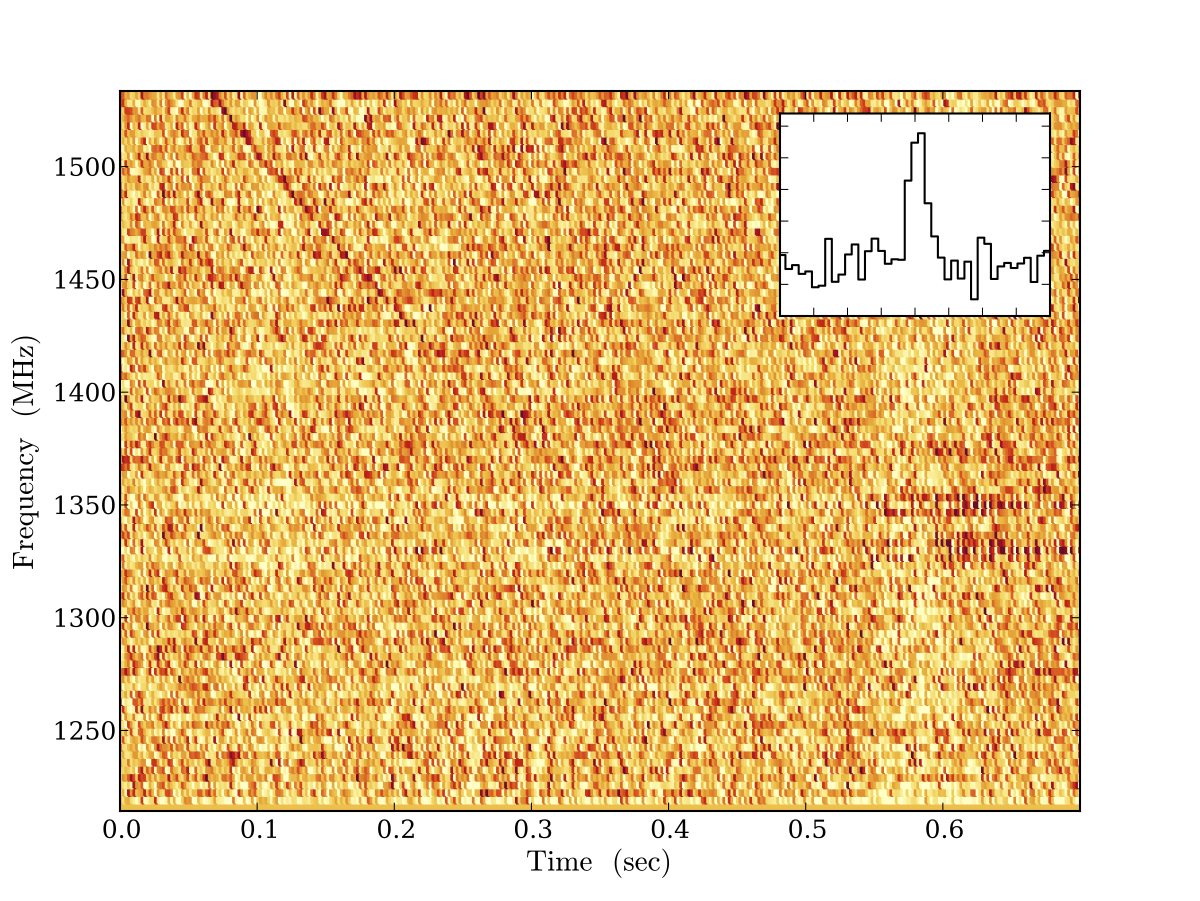

In [6]:
from IPython.display import Image
Image("example.png")

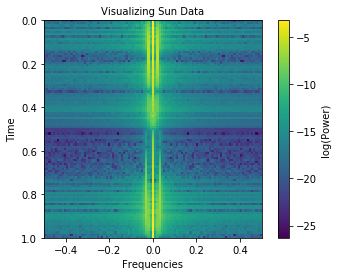

In [7]:
# Remember don't worry about getting the right time and frequency axes values 

windowed = windowed[:9801]
sunT = sunT[:9801]

length = int(np.sqrt(len(windowed)))

sun_reshaped = np.array(windowed.reshape((length, length)))
sun_fft_two_d = np.fft.fft(sun_reshaped)

power = np.fft.fftshift(np.abs(sun_fft_two_d)**2) # getting power of the 2D FFT and shifting
plt.imshow((np.log(power[::-1])), extent = [-0.5, 0.5, sunTsamp, 0])
plt.xlabel("Frequencies", fontsize = 10)
plt.ylabel("Time", fontsize = 10)

cbar = plt.colorbar()
cbar.ax.set_ylabel('log(Power)', fontsize = 10)
plt.title("Visualizing Sun Data", fontsize = 10)
plt.savefig("waterfall_sun.pdf")